<a href="https://colab.research.google.com/github/mauricio201922/DataScience-2/blob/main/Aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Nearest Neighbors

## Conceito de KNN
Imagine que você está tentando prever como eu vou votar nas próximas eleicões presidenciais. Se vocenão sabe mais nada sobre mim (e se voce tiver os dados), uma abordagem lógica é considerar como meusvizinhos estão planejando votar. Como eu moro no centro de Seattle, meus vizinhos estão planejando votar nocandidato democrata, o que sugere que o "candidato Democrata" é um bom palpite pra mim também. Essa é aideia por trás da classificação dos vizinhos mais próximos.

## O Modelo
Os vizinhos mais próximos é um dos modelos preditivos mais simples que existe. Ele não possui premissasmatemáticas e não requer nenhum tipo de maquinário pesado. Ele apenas requer

- Uma noção de distância
- Uma premissa de que pontos que estão perto um do outro são similares

O modelo KNN provavelmente não vão Ihe ajudar a entender os fatores determinantes de quaisquerfenomenos os quais você esteja considerando. Prever os meus votos baseados nos votos dos meus vizinhosnão lhe diz muito sobre o que me faz votar do meu jeito, enquanto que algum modelo alternativo que prevêmeu voto baseado (digamos) no meu salário e no meu estado civil talvez possa dizer. 

Em uma situação geral, temos alguns pontos de dados e um conjunto de rótulos correspondentes. Os rótulospodem ser True e False, indicando se cada entrada satisfaz algumas condição como "é spam?" ou "évenenoso?" ou "seria bom assistir?" Ou eles poderiam ser categorias, como classificações indicativas defilmes (L, 10, 12, 14, 16, 18). Ou eles poderiam ser nomes des candidatos à presidência. Ou eles poderiam serlinguagens de programação preferidas. 

No nosso caso, os pontos de dados serão vetores, o que significa que podemos usar a função **distance**que aprendemos no primeiro semestre. 

Digamos que escolhemos um número k como 3 ou 5. Então, quando queremos classificar alguns novospontos de dados, encontramos os pontos rotulados k mais próximos e os deixamos votar na nova saida (novoponto de dados). Para fazer isso, precisaremos de uma função que conte os votos. Uma possibilidade é:

In [105]:
## instalações
!pip install matplotlib

In [111]:
## imports
from collections import Counter
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [114]:
def raw_majority_vote(labels):
  votes = Counter(labels)

  winner, _ = votes.most_common(1)[0]

  return winner

In [115]:
raw_majority_vote(['L', 'L', 10, 10, 12])

'L'

In [116]:
def majority_vote(labels):
  """assumes that labels are ordered from nearest to farthest"""
  vote_counts = Counter(labels)
  winner, winner_count = vote_counts.most_common(1)[0]
  num_winners = len([count 
                     for count in vote_counts.values()
                     if count == winner_count])
  
  if num_winners == 1:
    return winner
  else:
    return majority_vote(labels[:-1])

In [117]:
print(raw_majority_vote(['L', 'L', 10, 10, 12]))
print(majority_vote(['L', 'L', 10, 10, 12]))

L
L


É certeza que esse método funcionará em algum momento, já que no pior das hipóteses reduziríamos para
somente um rótulo e, nesse caso, ele vence. Com essa função, é fácil criar um classificador:


In [118]:
def knn_classify(k, labeled_points, new_point):
 """each labeled point should be a pair (point, label)"""

 # order the labeled points from nearest to farthest
 by_distance = sorted(labeled_points,
 key=lambda point: distance.euclidean(point[0], new_point))

 # find the labels for the k closest
 k_nearest_labels = [label for _, label in by_distance[:k]]

 # and let them vote
 return majority_vote(k_nearest_labels)

## Exemplo: Linguagens Favoritas


Por meio de uma pesquisa descobrimos as linguagens de programação preferidas de programadores em
algumas cidades grandes:

In [119]:
# each entry is ([longitude, latitude], favorite_language)
cities = [([-122.3 , 47.53], "Python"), # Seattle
 ([-120.3 , 51.53], "Python"), # Random
 ([-121.8 , 42.53], "Python"), # Random
 ([-114.5 , 44.53], "Python"), # Random
 ([-114.1 , 41.33], "Python"), # Random
 ([-104.1 , 40.83], "Python"), # Random
 ([-106.9 , 36.93], "Python"), # Random
 ([-91.3 , 35.99], "Python"), # Random
 ([ -96.85, 32.85], "Java"), # Austin
 ([ -93.85, 29.85], "Java"), # Random
 ([ -95.85, 35.85], "Java"), # Random
 ([ -83.85, 37.45], "Java"), # Random
 ([ -87.95, 33.05], "Java"), # Random
 ([ -104.95, 38.05], "Java"), # Random
 ([ -99.15, 49.05], "Java"), # Random
 ([ -100.1, 43.07], "Java"), # Random
 ([ -89.33, 43.13], "R"), # Madison
 ([ -93.33, 44.53], "R"), # Random
 ([ -91.33, 41.13], "R"), # Random
 ([ -99.33, 45.13], "R"), # Random
 ([ -90.33, 47.53], "R"), # Random
 ([ -104.95, 48.05], "R"), # Random
 ([ -119.95, 34.95], "R"), # Random
 ([ -98.11, 39.95], "R"), # Random
 # ... and so on
]

Será que podemos usar esses resultados para prever as linguagens de programação favoritas para lugares
que não faziam parte da nossa pesquisa?

Como de costume, um bom primeiro passo é plotar os dados:

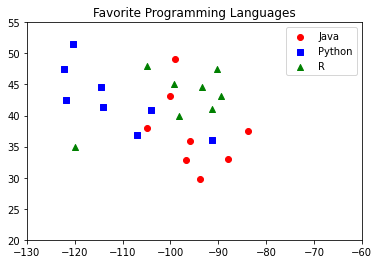

In [123]:

# key is language, value is pair (longitudes, latitudes)
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

# we want each language to have a different marker and color
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors = { "Java" : "r", "Python" : "b", "R" : "g" }

for (longitude, latitude), language in cities:
  plots[language][0].append(longitude)
  plots[language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
  plt.scatter(x, y, color=colors[language], marker=markers[language], label=language)

#plot_state_borders(plt) # pretend we have a function that does this
plt.legend(loc=0)
plt.axis([-130,-60,20,55]) # let matplotlib choose the location

# set the axes
plt.title("Favorite Programming Languages")
plt.show()

Já que os lugares mais perto tendem a gostar da mesma linguagem, os k-vizinhos mais próximos parecem ser
uma boa escolha para um modelo preditivo.
Para começar, vamos ver o que acontece se tentarmos prever a linguagem preferida de cada cidade usando
seus vizinhos em vez da própria cidade:

In [125]:
from collections import Counter
# try several different values for k
for k in [1, 3, 5, 7]:
 num_correct = 0
 for city in cities:
  location, actual_language = city
  other_cities = [other_city
    for other_city in cities
    if other_city != city]
  predicted_language = knn_classify(k, other_cities, location)
  if predicted_language == actual_language:
    num_correct += 1
 print (k, "neighbor[s]:", num_correct, "correct out of", len(cities))

1 neighbor[s]: 13 correct out of 24
3 neighbor[s]: 15 correct out of 24
5 neighbor[s]: 15 correct out of 24
7 neighbor[s]: 17 correct out of 24


Parece que com 7 vizinhos mais próximos tivemos um melhor desempenho, mostrando o resultado correto em
70,8 % das vezes:

- 1 vizinho[s]: 13 certos de 24 -> 54,1 %
- 3 vizinho[s]: 15 certos de 24 -> 62,5 %
- 5 vizinho[s]: 15 certos de 24 -> 62,5 %
- 7 vizinho[s]: 17 certos de 24 -> 70,8 %

Agora podemos ver quais regiões seriam classificadas para quais linguagens dentro do esquema dos vizinhos
mais próximos. Podemos fazer isso ao classificar uma rede inteira cheia de pontos, e então demarcá-las como
fizemos com as cidades:

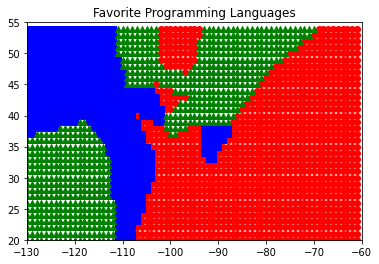

In [129]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
k = 1 # or 3, or 5, or...
for longitude in range(-130, -60):
  for latitude in range(20, 55):
    predicted_language = knn_classify(k, cities, [longitude, latitude])
    plots[predicted_language][0].append(longitude)
    plots[predicted_language][1].append(latitude)

for language, (x, y) in plots.items():
  plt.scatter(x, y, color=colors[language], marker=markers[language], label=language)

#plot_state_borders(plt) # pretend we have a function that does this
#plt.legend(loc=0)
plt.axis([-130,-60,20,55]) # let matplotlib choose the location

# set the axes
plt.title("Favorite Programming Languages")
plt.show()

Por exemplo, a figura a seguir mostra o que acontece quando olhamos apenas o vizinho mais próximo (k=1).
Vemos muitas mudanças abruptas de uma linguagem para outra com limites bem acentuados. Conforme
aumentamos o número de vizinhos para três, vemos regiões mais flexíveis para cada linguagem.

E conforme aumentamos os vizinhos para cinco, os limites ficam cada vez mais acentuados.
Aqui, nossas dimensões são bastante comparáveis, mas se elas não fossem você talvez quisesse
redimensionar os dados.


## A Maldição da Dimensionalidade


Os k-vizinhos mais próximos entram em perigo em dimensões muito altas graças à "maldição da da
dimensionalidade" que se resume ao fato de que espaços de alta dimensão são vastos. Os pontos em
espaços de alta dimensão tendem a não ser próximos uns dos outros. Uma maneira de observar isso é gerar
pares de pontos aleatórios em uma variedade de dimensões e calcular a distância entre eles.

Gerar pontos aleatórios deve ser algo natural a partir de agora:


In [130]:
def random_point(dim):
  return [random.random() for _ in range(dim)]

Assim como escrever uma função que calcula as distâncias:

In [131]:
def random_distances(dim, num_pairs):
  return [distance.euclidean(random_point(dim), random_point(dim))
    for _ in range(num_pairs)]

Para cada dimensão de 1 até 100, computaremos 10.000 distâncias e as usaremos para computar as
distâncias média entre os pontos de cada dimensão.


In [132]:
import random
import numpy as np

dimensions = range(1, 101)
avg_distances = []
min_distances = []
random.seed(0)
for dim in dimensions:
  distances = random_distances(dim, 10000) # 10,000 random pairs
  avg_distances.append(np.mean(distances)) # track the average
  min_distances.append(min(distances)) # track the minimum

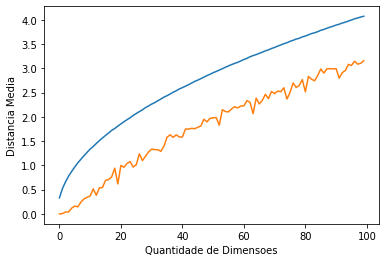

In [138]:
plt.plot(avg_distances)
plt.plot(min_distances)
plt.ylabel('Distancia Media')
plt.xlabel('Quantidade de Dimensoes')
plt.show()

Conforme o número de dimensões aumenta, a distância média entre os pontos também aumenta.
Mas o que é mais problemático é a relação entre a distância mais próxima e a distância média.


In [139]:
min_avg_ratio = [min_dist / avg_dist
  for min_dist, avg_dist in zip(min_distances, avg_distances)]

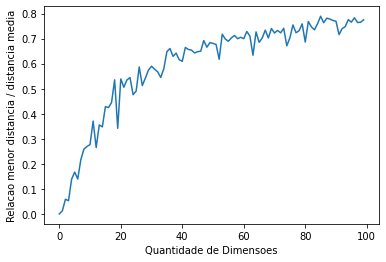

In [140]:
plt.plot(min_avg_ratio)
plt.ylabel('Relacao menor distancia / distancia media')
plt.xlabel('Quantidade de Dimensoes')
plt.show()

Em conjuntos de dados de baixa dimensão, os pontos mais próximos tendem a ser mais próximos do que a
média. Mas os dois pontos estão próximos somente se eles estiverem próximos em todas as dimensões e
cada dimensão extra - mesmo se for somente um ruído - é outra oportunidade para cada ponto ser mais
distante dos outros.
Quando há muitas dimensões, é provável que os pontos mais próximos não sejam tão próximos quanto a
média, o que significa que dois pontos estarem próximos não significa muita coisa (a menos que haja
bastanite estrutura em seus dados que faça com que eles se comportem como se estivessem em uma
dimensão muito mais baixa)
Uma forma diferente de pensar sobre o problema envolve a dispersão de espaços de alta dimensão. Se você
escolher 50 números aleatórios entre 0 e l, é provável que vocé tenha uma boa parte do intervalo unitário.

Se você escolher 50 pontos aleatórios no quadrado unitário, você terá menos cobertura.

E em três dimensoes menos ainda. matplotlib não permite gráficos de quatro dimensoes, portanto este é o
máximo que iremos, mas vocè já pode ver que estão começando a ter grandes espaços vazios sem pontos
perto deles. Em mais dimensões, a menos que você tenha muito mais dados, esses espaços grandes e vazios
representam regiões distantes de todos os pontos que você quer usar nas suas previsões.
Então, se você estiver tentando usar os vizinhos mais próximos em uma dimensão mais alta, é provavelmente
uma boa ideia fazer uma redução de dimensionalidade primeiro.